In [ ]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
import cv2
import pandas as pd

Load Data

In [ ]:
data_dir = 'Affectnet Dataset'
data=pd.read_csv('Affectnet Dataset\labels.csv')

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
X = data['pth'].values
y = data['label'].values

In [ ]:
X

In [ ]:
import cv2
test_img=cv2.imread('Affectnet Dataset/anger/image0000006.jpg')
#type(test_img)
# test_img.flatten()/255
test_img.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import cv2

def preprocess_image(image_path):
    img = cv2.imread(data_dir+"/"+image_path)    
    img_normalized = img / 255.0
    return img_normalized

# for image_path in X:
#     X_preprocessed=np.append(preprocess_image)
X_preprocessed=np.array([preprocess_image(image_path) for image_path in X])


le = LabelEncoder()
y_preprocessed = to_categorical(le.fit_transform(y))

In [ ]:
#X_preprocessed=np.array([preprocess_image(image_path) for image_path in X])
# data_dir='Affectnet Dataset'
# X_preprocessed=[]

# for image_path in X:
#     img = cv2.imread(data_dir+"/"+image_path)    
#     img_normalized = img/255.0
#     X_preprocessed.append(img_normalized)
#     # 


# X_preprocessed=np.array(X_preprocessed)



Spliting Test train 


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_preprocessed, test_size=0.2, random_state=42, stratify=y)

Creating CNN model

Building Deep learning model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3,3), 1, activation='relu', input_shape=(96,96,3)))#Convolution layer 1
model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))#Pooling layer 1
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), 1, activation='relu'))#Convolution layer 2
model.add(MaxPooling2D(pool_size=(2,2)))#Pooling layer 2
#model.add(Dropout(0.25))
model.add(Conv2D(16, (3,3), 1, activation='relu'))#Convolution layer 3
model.add(MaxPooling2D(pool_size=(2,2)))#Pooling layer 3
model.add(Dropout(0.25))

model.add(Flatten())#Fully Connected layer
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))


#model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))#Output layer

In [ ]:
from keras import metrics

# model.compile(loss='mean_squared_error', optimizer='sgd',
#               metrics=[metrics.mae,
#                        metrics.categorical_accuracy])

model.compile(optimizer='adam', 
          loss='categorical_crossentropy', 
          metrics=['accuracy'])

model.summary()

In [ ]:
#model.compile('sgd', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

Visualize CNN model

In [ ]:
import visualkeras
visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='Neural_Network_Visualize45Epochs.png') # write to disk
visualkeras.layered_view(model, to_file='Neural_Network_Visualize45Epochs.png').show() # write and show

Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [19]:
Log_history = model.fit(X_train,y_train, epochs=45, batch_size=64,validation_split=0.2,callbacks=[tensorboard_callback])

282/282 [==============================] - 572s 2s/step - loss: 2.0652 - accuracy: 0.1628 - val_loss: 2.0666 - val_accuracy: 0.1679


In [20]:
model.save_weights('models/CNN_45epochs.h5')

<Axes: >

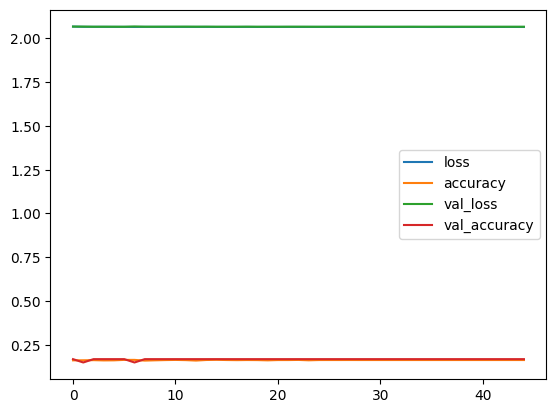

In [21]:
import pandas as pd
pd.DataFrame(Log_history.history).plot()

Performance

In [22]:
label_mapping={0: 'anger',
 1: 'contempt',
 2: 'disgust',
 3: 'fear',
 4: 'happy',
 5: 'neutral',
 6: 'sad',
 7: 'surprise'}

177/177 [==============================] - 38s 214ms/step
      Label  Precision  Recall  F1-score  AUC
0     anger   0.000000   0.000  0.000000  0.5
1  contempt   0.000000   0.000  0.000000  0.5
2   disgust   0.000000   0.000  0.000000  0.5
3      fear   0.000000   0.000  0.000000  0.5
4     happy   0.000000   0.000  0.000000  0.5
5   neutral   0.000000   0.000  0.000000  0.5
6       sad   0.000000   0.000  0.000000  0.5
7  surprise   0.163798   1.000  0.281488  0.5
8   Overall   0.020475   0.125  0.035186  0.5


c:\Users\Biswaji Deb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Biswaji Deb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Biswaji Deb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

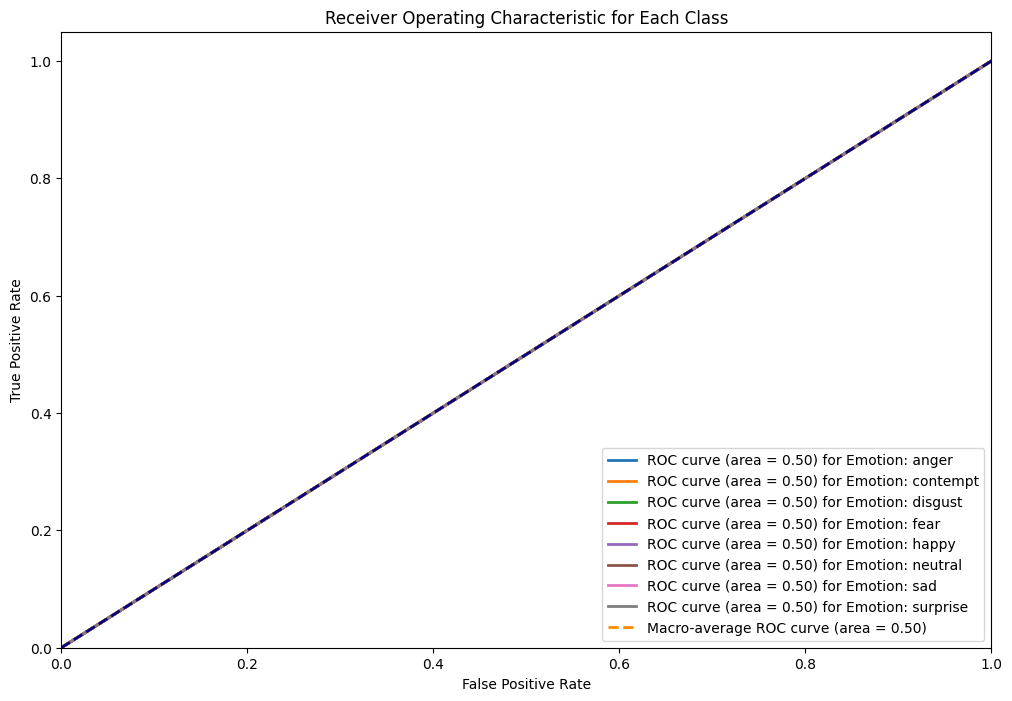

In [23]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score

y_pred_prob=model.predict(X_test)
# Convert probabilities to binary predictions
y_pred_labels = np.argmax(y_pred_prob, axis=1)

# Convert y_test to binary labels
y_true_labels = np.argmax(y_test, axis=1)

# List to store individual precision, recall, and F1-score values for each class
class_metrics = []

# List to store individual AUC values and ROC curves for each class
roc_curves = []


for i in range(8):
    # Convert predicted and true labels to binary labels
    y_pred_binary = (y_pred_labels == i)
    y_true_binary = (y_true_labels == i)
    
    # Calculate precision, recall, and F1-score
    precision = precision_score(y_true_binary, y_pred_binary)
    recall = recall_score(y_true_binary, y_pred_binary)
    f1 = f1_score(y_true_binary, y_pred_binary)
    
    # ROC curve calculation
    fpr, tpr, _ = roc_curve(y_true_binary, y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    roc_curves.append((fpr, tpr, label_mapping[i]))
    
    # Store metrics in a dictionary
    class_metrics.append({
        'Label': label_mapping[i],
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC': roc_auc
    })


    
# Compute and plot macro-average ROC curve
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.mean([np.interp(mean_fpr, fpr, tpr) for fpr, tpr, _ in roc_curves], axis=0)
macro_auc = auc(mean_fpr, mean_tpr)




# Calculate overall precision, recall, and F1-score
overall_precision = precision_score(y_true_labels, y_pred_labels, average='macro')
overall_recall = recall_score(y_true_labels, y_pred_labels, average='macro')
overall_f1 = f1_score(y_true_labels, y_pred_labels, average='macro')

class_metrics.append({
    'Label': 'Overall',
    'Precision': overall_precision,
    'Recall': overall_recall,
    'F1-score': overall_f1,
    'AUC': macro_auc
})


# Create a Pandas DataFrame from the list of metrics
metrics_df = pd.DataFrame(class_metrics)

# Optionally, print the metrics table
print(metrics_df)


# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
lw = 2

    
for fpr, tpr, label in roc_curves:
    plt.plot(fpr, tpr, lw=lw, label='ROC curve (area = {:.2f}) for Emotion: {}'.format(roc_auc, label))

plt.plot(mean_fpr, mean_tpr, color='darkorange', linestyle='--', linewidth=2, label='Macro-average ROC curve (area = {:.2f})'.format(macro_auc))


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Each Class')
plt.legend(loc='lower right')
plt.show()

Evaluate performance

Test

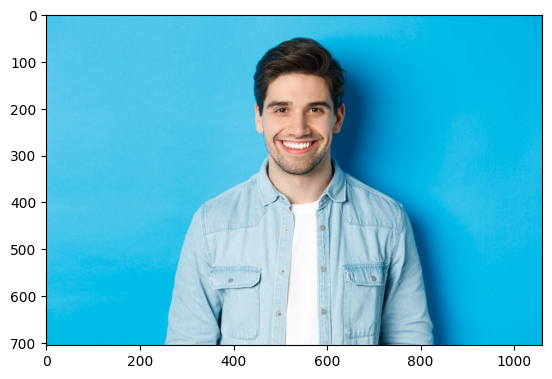

In [24]:
img = cv2.imread('test/happy.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [25]:
img.shape

(706, 1060, 3)

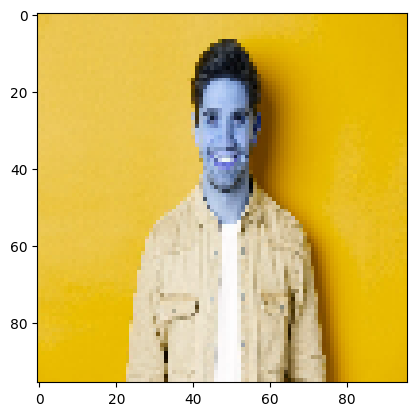

In [26]:
resize = tf.image.resize(img, (96,96))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [27]:
import numpy as np

In [28]:
resize.shape

TensorShape([96, 96, 3])

In [29]:
np.expand_dims(resize,0).shape

(1, 96, 96, 3)

In [30]:

yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 27ms/step


In [31]:

yhat

array([[0.12941767, 0.11383781, 0.12409376, 0.1080412 , 0.15505257,
        0.10103357, 0.1059204 , 0.16260298]], dtype=float32)

In [32]:
yhat

array([[0.12941767, 0.11383781, 0.12409376, 0.1080412 , 0.15505257,
        0.10103357, 0.1059204 , 0.16260298]], dtype=float32)

In [33]:
classify_result = np.argmax(yhat)
classify_result

7

In [34]:
label_mapping={0: 'anger',
 1: 'contempt',
 2: 'disgust',
 3: 'fear',
 4: 'happy',
 5: 'neutral',
 6: 'sad',
 7: 'surprise'}

Save the model

In [35]:
from tensorflow.keras.models import load_model

In [36]:
model.save(os.path.join('models','Final_CNN_with25epochs.h5'))

C:\Users\Biswaji Deb\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
new_model = load_model(os.path.join('models','Final_CNN_with25epochs.h5'))

In [38]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 62ms/step


array([[0.12941767, 0.11383781, 0.12409376, 0.1080412 , 0.15505257,
        0.10103357, 0.1059204 , 0.16260298]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


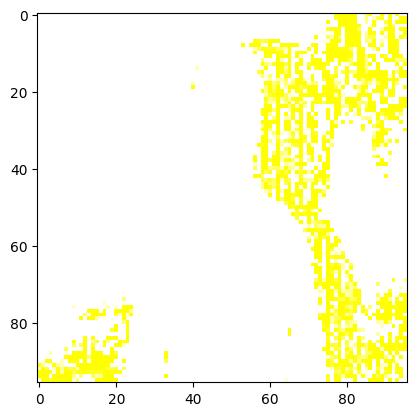

In [39]:
plt.imshow(resize)